In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Solving Systems of Nonlinear Equations

Consider a system of nonlinear equations of the form

$$\begin{align}
y_1 &= f_1(\bm{x}) = 0 \nonumber \\
y_2 &= f_2(\bm{x}) = 0 \nonumber \\
\vdots \nonumber \\
y_m &= f_m(\bm{x}) = 0 \nonumber \\
\end{align}$$

where $\bm{x} = [x_1, x_2, \ldots, x_m]^T$ is the vector of inputs to the nonlinear equations. We wish to solve for the solution $\hat{\bm{x}}$ that satisfies this system of equations. Let $\bm{f}(\bm{x}) = [f_1(\bm{x}), f_2(\bm{x}), \ldots, f_m(\bm{x})]^T$ be the vector of nonlinear equations.

We start be expanding out the Taylor series to a first-order approximation. Let $\bm{x}_0$ be a fixed point or initial guess.

$$0 = \bm{f}(\hat{\bm{x}}) = \bm{f}(\bm{x}_0) + \nabla \bm{f}(\bm{x}_0)(\hat{\bm{x}} - \bm{x}_0) + \mathcal{O}^2$$

We omit the higher-order terms and solve for $\hat{\bm{x}}$, which is the solution to this system of equations.

$$0 = \bm{f}(\bm{x}_0) + \nabla \bm{f}(\bm{x}_0)(\hat{\bm{x}} - \bm{x}_0)$$

Let's inspect the $\nabla \bm{f}(\bm{x}_0)$ term. $\nabla$ is the gradiant operator which performs a vector derivative on its operand. Recall that both $\bm{x}$ and $\bm{f}(\bm{x})$ are vector quantities.

$$\nabla \bm{f}(\bm{x}_0) = \frac{\partial \bm{f}}{\partial \bm{x}}(\bm{x_0}) = 
\begin{bmatrix}
    \dfrac{\partial \bm{f}_1}{\partial x_1}(\bm{x_0}) & \dfrac{\partial \bm{f}_1}{\partial x_2}(\bm{x_0}) & \ldots & \dfrac{\partial \bm{f}_1}{\partial x_m}(\bm{x_0}) \\[3ex]
    \dfrac{\partial \bm{f}_2}{\partial x_1}(\bm{x_0}) & \dfrac{\partial \bm{f}_2}{\partial x_2}(\bm{x_0}) & \ldots & \dfrac{\partial \bm{f}_2}{\partial x_m}(\bm{x_0}) \\[1ex]
    \vdots & \vdots & \ddots & \vdots \\[1ex]
    \dfrac{\partial \bm{f}_m}{\partial x_1}(\bm{x_0}) & \dfrac{\partial \bm{f}_m}{\partial x_2}(\bm{x_0}) & \ldots & \dfrac{\partial \bm{f}_m}{\partial x_m}(\bm{x_0}) \\
\end{bmatrix} = J(\bm{x_0})$$

Here, we define the Jacobian matrix, $J$. Each element of the matrix represents the derivative of a nonlinear function with respect to a specific input. We can substitute the Jacobian matrix into the first-order approximation.

$$0 = \bm{f}(\bm{x}_0) +J(\bm{x}_0)(\hat{\bm{x}} - \bm{x}_0)$$

Rearranging this equation and solving for the solution, $\hat{\bm{x}}$, we get

$$\hat{\bm{x}} = \bm{x}_0 - J^{-1}(\bm{x}_0)\bm{f}(\bm{x}_0)$$

From a numerical methods perspective, we can also think of this as an iterative solution

$$\boxed{\bm{x}_{k+1} = \bm{x}_k - J^{-1}(\bm{x}_k)\bm{f}(\bm{x}_k)}$$

### Example

Let's try an example. Consider the following system of equations:

$$\begin{align}
f_1(\bm{x}) &= x_1^3 + x_2 - 1 = 0 \nonumber \\
f_2(\bm{x}) &= -x_1 + x_2^3 + 1 = 0\nonumber
\end{align}$$

Given the initial guess of $\bm{x_0} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$, find the solution to this systems of nonlinear equations to a tolerance of $\lVert x \rVert _2 < 1 \times 10^{-8}$. Report the number of iterations, the residual, and the solution.

In [14]:
# Function vector
def f(x):
    f1 = x[0]**3 + x[1] - 1
    f2 = -x[0] + x[1]**3 + 1
    return np.array([f1,f2],dtype=float)

# Jacobian matrix
def J(x):
    return np.array([[3*x[0]**2, 1],
                     [-1, 3*x[1]**2]],dtype=float)

# Parameters
x0 = np.array([1,1]) # Initial guess
tol = 1e-8 # Tolerance
maxIter = 100 # Max iterations

for i in range(1,maxIter+1):
    J_inv = np.linalg.inv(J(x0))
    x = x0 - J_inv @ f(x0) # Multivariable NR-method
    x0 = x

    res = np.linalg.norm(f(x)) # Residual

    # Convergence criteria
    if res < tol:
        print(f'Converged after {i} iterations')
        print(f'Residual = {res}')
        print(f'x = {x}')
        break

    # Failure to converge
    if i == maxIter:
        print(f'Could not converge in {maxIter} iterations')

Converged after 6 iterations
Residual = 1.817881472295665e-12
x = [1.00000000e+00 1.82650037e-12]


### Example 2

Let's try another example. Consider the following system of equations:

$$\begin{align}
f_1(\bm{x}) &= 3x_1 + x_1^2 + x_2^2 = 0 \nonumber \\
f_2(\bm{x}) &= x_1x_2 - x_2^2 = 0\nonumber
\end{align}$$

Given the initial guess of $\bm{x_0} = \begin{bmatrix} 2 \\ 2 \end{bmatrix}$, find the solution to this systems of nonlinear equations to a tolerance of $\lVert x \rVert < 1 \times 10^{-10}$. Report the number of iterations, residual, and the solution.

In [15]:
# CODE sOLUTION HERE

# Nonlinear Least-Squares

Let $n > m$. For a given set of $n$ data points, $[x_n,y_n]$,

$$\bm{x} = \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{bmatrix}, ~~~~~
\bm{y} = \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}$$

a set of $m$ unknown parameters, $\bm{c}$,

$$\bm{c} = \begin{bmatrix}
    c_1 \\
    c_2 \\
    \vdots \\
    c_m
\end{bmatrix}$$

and a nonlinear fitting function, $\hat{\bm{y}} = f(\bm{x},\bm{c})$, we want to find the solution that minimizes the $L_2$-norm of the residual, $\bm{r} = \hat{\bm{y}} - \bm{y}$,

$$\min \sum_{k=1}^{n}\left(\hat{y}_{k} - y_{k}\right)^{2}$$

Unlike the classic linear least-squares problem, we cannot immediately convert this equation into a linear form $A \bm{x} = \bm{b}$ since the parameters are embedded in the equation in a nonlinear fashion that cannot be simplified. To remedy this, we will linearize the function, $f(\bm{x},\bm{c})$, about a fixed-point (initial guess), $\bar{\bm{c}}$, by means of a first-order Taylor series expansion.

$$\hat{\bm{y}} = f(\bm{x},\bm{c}) = f(\bm{x},\bar{\bm{c}}) + \nabla f(\bm{x},\bar{\bm{c}})(\bm{c} - \bar{\bm{c}}) + \mathcal{O}^2$$

We omit the higher-order terms and attempt to equate this to the true data points, $\bm{y}$,

$$\bm{y} \approx f(\bm{x},\bm{c}) = f(\bm{x},\bar{\bm{c}}) + \nabla f(\bm{x},\bar{\bm{c}})(\bm{c} - \bar{\bm{c}})$$

We can see that by moving the term $f(\bm{x},\bar{\bm{c}})$ to the other side of the equation, we have solved for the residual of our fixed-point.

$$\begin{align}
\bm{y} - \hat{\bar{\bm{y}}} &= -\bar{\bm{r}}_0 \nonumber \\
&= \bm{y} - f(\bm{x},\bar{\bm{c}}) \nonumber \\
&= \nabla f(\bm{x},\bar{\bm{c}})(\bm{c} - \bar{\bm{c}}) \nonumber
\end{align}$$

Similar to the previous section, $\nabla f(\bm{x},\bar{\bm{c}})$ will return a Jacobian matrix. In the case of the nonlinear least-squares problem, it will have the form,

$$\nabla f(\bm{x},\bar{\bm{c}}) = \frac{\partial f}{\partial \bm{c}}(\bm{x},\bar{\bm{c}}) = 
\begin{bmatrix}
    \dfrac{\partial f}{\partial c_1}(x_1,\bar{\bm{c}}) & \dfrac{\partial f}{\partial c_2}(x_1,\bar{\bm{c}}) & \ldots & \dfrac{\partial f}{\partial c_m}(x_1,\bar{\bm{c}}) \\[3ex]
    \dfrac{\partial f}{\partial c_1}(x_2,\bar{\bm{c}}) & \dfrac{\partial f}{\partial c_2}(x_2,\bar{\bm{c}}) & \ldots & \dfrac{\partial f}{\partial c_m}(x_2,\bar{\bm{c}}) \\[1ex]
    \vdots & \vdots & \ddots & \vdots \\[1ex]
    \dfrac{\partial f}{\partial c_1}(x_n,\bar{\bm{c}}) & \dfrac{\partial f}{\partial c_2}(x_n,\bar{\bm{c}}) & \ldots & \dfrac{\partial f}{\partial c_m}(x_n,\bar{\bm{c}}) \\
\end{bmatrix} = J(x,\bar{\bm{c}}) $$

Note that the rows correspond to the $n$ data points and the columns correspond to the partial derivative of the fitting function with respect to the $m$th parameter. Substitute the Jacobian into the residual equation.

$$-\bar{\bm{r}}_0 = J(\bm{x},\bar{\bm{c}})(\bm{c} - \bar{\bm{c}}) \implies A \bm{x} = \bm{b}$$

At last, we see this least-squares problem presented in a linear form. To visually simplify this expression, let $J = J(\bm{x},\bar{\bm{c}})$. From previous lessons, we already know the solution to this problem so we can solve for the difference vector, $\bm{c} - \bar{\bm{c}}$,

$$\bm{c} - \bar{\bm{c}} = -\left(J^T J\right)^{-1} J^T \bar{\bm{r}}$$

Rearranging the equation once more to solve for the unknown parameters, $\bm{c}$, we get

$$\bm{c} = \bar{\bm{c}} - \left(J^T J\right)^{-1} J^T \bar{\bm{r}}$$

Recall that $\bar{\bm{c}}$ representes a fixed-point. As an iterative process, we treat this value as an initial guess.

$$\boxed{\bm{c}_{k+1} = \bm{c}_k - \left(J_k^T J_k\right)^{-1} J_k^T \bm{r}_k}$$

### Example

Create 100 data points for $x$ uniformly distributed between $-1.5$ and $1.5$ with the equation

$$f(x) = \beta_1 x^3 + \beta_2 e^{\beta_3 x} + \beta_4 x \sin{x^2}$$

where

$$\beta =
\begin{bmatrix}
    2 \\
    4 \\
    -0.5 \\
    -\pi/2
\end{bmatrix}$$

Corrupt the measurments with Gaussian noise $\mathcal{N}(0,0.1)$. Estimate the parameters by iterative nonlinear least-squares with initial guess $\beta = [1,1,1,1]^T$ to an $L_2$-normed residual tolerance of $1 \times 10^{-5}$

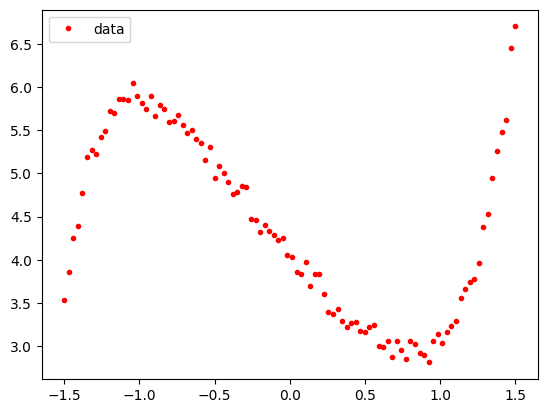

In [19]:
def f(x,B):
    return B[0]*x**3 + B[1]*np.exp(B[2]*x) + B[3]*x*np.sin(x**2)

# True params
B_true = np.array([2,4,-0.5,-np.pi/2])

# x-vals
x = np.linspace(-1.5,1.5,100)

# function
f_true = f(x,B_true)
noise = np.random.normal(0,0.1,100)
f_meas = f_true + noise

# plt.plot(x,f_true,'b-',label='truth')
plt.plot(x,f_meas,'r.',label='data')
plt.legend()
plt.show()

In [ ]:
def J(x,B):
    return np.array([x**3, np.exp(B[2]*x), x*B[1]*np.exp(B[2]*x), x*np.sin(x**2)]).T

B_0 =np.array([1,1,1,1])
maxIter = 100
tol = 1e-5
res = f(x,B_0) - f(x,B_true)